#**BOOSTING ASSIGNMENT**

1. What is Boosting in Machine Learning? Explain how it improves weak
learners.
    - Boosting trains a series of weak learners (often shallow trees) one after another, where each new learner gives more attention to instances that previous learners handled poorly. By weighting difficult samples more and aggregating all learner's outputs, boosting converts weak learners that are only slightly better than random into a strong, highly accurate model.

2. What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?
      - AdaBoost adjusts sample weights after each iteration, increasing the weights of misclassified points so that the next learner focuses on them, and combines learners using weights derived from their errors.
      - Gradient Boosting instead fits each new learner to the negative gradient (residual errors) of a chosen loss function, treating boosting as a gradient descent procedure in function space.

3.  How does regularization help in XGBoost?
    - XGBoost adds explicit L1 and L2 regularization terms on tree weights to penalize complex models and reduce overfitting. These penalties, controlled by parameters such as reg_alpha (L1) and reg_lambda (L2), encourage sparse or smaller weights, leading to more stable and generalizable models.

4. Why is CatBoost considered efficient for handling categorical data?
    - CatBoost can consume categorical features directly and internally transforms them (for example, via target-based statistics and ordered encodings), avoiding heavy manual preprocessing like extensive one-hot encoding. Its specialized encodings reduce overfitting on categories and work efficiently even with high-cardinality categorical variables.

5. What are some real-world applications where boosting techniques are
preferred over bagging methods?
    - Boosting is often preferred in applications where maximizing accuracy and capturing subtle patterns is critical, such as fraud detection, credit risk scoring, and medical diagnosis. In these settings, sequentially correcting errors helps reduce bias and model complex decision boundaries better than bagging methods like Random Forests.

Datasets:
● Use sklearn.datasets.load_breast_cancer() for classification tasks.
● Use sklearn.datasets.fetch_california_housing() for regression
tasks.

In [1]:
#6. Write a Python program to:
#● Train an AdaBoost Classifier on the Breast Cancer dataset
#● Print the model accuracy

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Base estimator (weak learner)
base_estimator = DecisionTreeClassifier(max_depth=1, random_state=42)

# AdaBoost classifier
ada = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=100,
    learning_rate=0.5,
    random_state=42
)

ada.fit(X_train, y_train)

y_pred = ada.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("AdaBoost Test Accuracy:", accuracy)



AdaBoost Test Accuracy: 0.956140350877193


In [2]:
#7. Write a Python program to:
#● Train a Gradient Boosting Regressor on the California Housing dataset
#● Evaluate performance using R-squared score

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

housing = fetch_california_housing()
X, y = housing.data, housing.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("Gradient Boosting R-squared:", r2)


Gradient Boosting R-squared: 0.7777683901251662


In [3]:
# 8. Write a Python program to:
#● Train an XGBoost Classifier on the Breast Cancer dataset
#● Tune the learning rate using GridSearchCV
#● Print the best parameters and accuracy

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Base XGBoost model
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

# Parameter grid for learning rate
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200],
    'max_depth': [3, 4]
}

# GridSearchCV
grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=1
)

# Fit
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)


best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best XGBoost Test Accuracy:", accuracy)


Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [07:29:35] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}
Best XGBoost Test Accuracy: 0.9473684210526315


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.6 MB/s eta 0:00:00


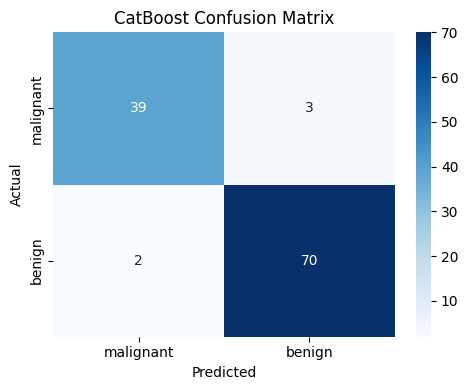

In [5]:
import sys
!{sys.executable} -m pip install catboost

#9. Write a Python program to:
#● Train a CatBoost Classifier
#● Plot the confusion matrix using seaborn

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_breast_cancer
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

cb = CatBoostClassifier(
    iterations=200,
    learning_rate=0.05,
    depth=4,
    loss_function='Logloss',
    verbose=0,
    random_state=42
)

cb.fit(X_train, y_train)

y_pred = cb.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("CatBoost Confusion Matrix")
plt.tight_layout()
plt.show()


10. You're working for a FinTech company trying to predict loan default using customer demographics and transaction behavior.
The dataset is imbalanced, contains missing values, and has both numeric and categorical features.
Describe your step-by-step data science pipeline using boosting techniques:
● Data preprocessing & handling missing/categorical values
● Choice between AdaBoost, XGBoost, or CatBoost
● Hyperparameter tuning strategy
● Evaluation metrics you'd choose and why
● How the business would benefit from your model


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier
import numpy as np

# Example: load your data
# df = pd.read_csv("loan_data.csv")
# Assume:
#   - target column: "default" (1 = default, 0 = no default)
#   - rest are features

# Create a dummy DataFrame for demonstration purposes
data = {
    'customer_id': range(1000),
    'age': np.random.randint(18, 70, 1000),
    'income': np.random.normal(50000, 15000, 1000),
    'education': np.random.choice(['High School', 'Bachelors', 'Masters', 'PhD'], 1000, p=[0.25, 0.4, 0.2, 0.15]),
    'marital_status': np.random.choice(['Single', 'Married', 'Divorced'], 1000, p=[0.3, 0.6, 0.1]),
    'num_transactions': np.random.randint(5, 100, 1000),
    'avg_transaction_amount': np.random.normal(200, 75, 1000),
    'loan_amount': np.random.normal(10000, 3000, 1000),
    'credit_score': np.random.randint(300, 850, 1000),
    'default': np.random.choice([0, 1], 1000, p=[0.85, 0.15]) # Imbalanced dataset
}
df = pd.DataFrame(data)

# Introduce some missing values randomly
for col in ['income', 'education', 'marital_status', 'avg_transaction_amount']:
    df.loc[df.sample(frac=0.05).index, col] = np.nan

target_col = "default"

X = df.drop(columns=[target_col])
y = df[target_col]

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object", "category"]).columns

# Preprocessing for numeric features: impute missing with median
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

# Preprocessing for categorical features: impute and one-hot encode
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# XGBoost classifier (works well on tabular, imbalanced-aware with scale_pos_weight if needed)
xgb_clf = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    tree_method="hist",
    random_state=42,
    scale_pos_weight=1.0   # you can set ratio of negative/positive for imbalance
)

# Full pipeline
clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", xgb_clf)
])

# Train–test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Hyperparameter search space
param_distributions = {
    "model__n_estimators": [100, 200, 300],
    "model__max_depth": [3, 4, 5],
    "model__learning_rate": [0.01, 0.05, 0.1],
    "model__subsample": [0.7, 0.8, 1.0],
    "model__colsample_bytree": [0.7, 0.8, 1.0],
}

search = RandomizedSearchCV(
    clf,
    param_distributions=param_distributions,
    n_iter=15,
    scoring="roc_auc",
    cv=3,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit
search.fit(X_train, y_train)

print("Best params:", search.best_params_)

# Evaluate
best_model = search.best_estimator_
y_proba = best_model.predict_proba(X_test)[:, 1]
y_pred = (y_proba >= 0.5).astype(int)

auc = roc_auc_score(y_test, y_proba)
print("Test ROC-AUC:", auc)
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best params: {'model__subsample': 0.8, 'model__n_estimators': 300, 'model__max_depth': 4, 'model__learning_rate': 0.1, 'model__colsample_bytree': 1.0}
Test ROC-AUC: 0.4995228096965069
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       169
           1       0.25      0.03      0.06        31

    accuracy                           0.83       200
   macro avg       0.55      0.51      0.48       200
weighted avg       0.75      0.83      0.78       200

